In [426]:
import numpy as np
import pandas as pd
import xlrd
import xlwt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import jupyterlab
%matplotlib inline
import warnings

In [427]:
warnings.filterwarnings(action='ignore', category=UserWarning)

In [428]:
training = pd.read_csv('processedTrain.csv')

In [429]:

X = training.drop(['AVERAGE_SPEED_DIFF'],axis=1)

y = training['AVERAGE_SPEED_DIFF']


In [430]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE 
from imblearn.combine import SMOTEENN 
from imblearn.combine import SMOTETomek 
from imblearn.under_sampling import NearMiss 

In [431]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2021,stratify=y)

In [432]:
#scaler = preprocessing.StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [433]:
X_res = X_train
#X_test = X_test_scaled
y_res = y_train

In [434]:
y_train.value_counts()

None         1760
Medium       1321
Low          1135
High          850
Very_High     383
Name: AVERAGE_SPEED_DIFF, dtype: int64

In [435]:
strat = {
    0: 1321,
    1: 1135,
    2: 1321, 
    3: 850,
    4: 383,
}

nm = NearMiss(sampling_strategy=strat)

#X_under, y_under = nm.fit_resample(X_train_scaled, y_train)

#rus = RandomUnderSampler(sampling_strategy=strat)
#X_under, y_under = rus.fit_resample(X_train_scaled, y_train)


#X_res, y_res = ros.fit_resample(X_under, y_under)


In [436]:

#smote = RandomOverSampler(sampling_strategy="not majority")
smote = SMOTE(k_neighbors = 3)
#smote = ADASYN(random_state=2021)
#smote = BorderlineSMOTE(kind='borderline-2')
#smote = SMOTEENN(sampling_strategy='not majority')
#smote = SMOTETomek(sampling_strategy='auto')
#smote = SVMSMOTE(random_state=2021,sampling_strategy="not majority")

In [437]:
#y_train.value_counts().plot.pie(autopct='%.2f')

In [438]:
#y_res.value_counts().plot.pie(autopct='%.2f')

In [439]:
#sns.displot(y_res)
#sns.displot(y_test)

In [440]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import RidgeClassifier
from imblearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline 

In [441]:
lr = LogisticRegression(solver='liblinear',random_state=2021)
rf=RandomForestClassifier(random_state=2021,n_estimators=100)
knn=KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=2021)
ada = AdaBoostClassifier(random_state=2021)
svc = SVC(random_state=2021)
xgb = XGBClassifier()
rc = RidgeClassifier(random_state=2021)

In [442]:
from sklearn.model_selection import StratifiedKFold
cv_strat = StratifiedKFold(n_splits=10, shuffle=False, random_state=1)

C:\Users\Krow\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [443]:
models = [lr,rf,knn,dt,ada,svc,rc,xgb] 

In [444]:
for i in models:
    model = i
    imba_pipeline = make_pipeline(smote,model)
    
    print('______________________________________________')
    print(i)
    print('..............................................')
    cv = cross_val_score(imba_pipeline,X_res,y_res,cv=cv_strat,n_jobs=-1)
    model.fit(X_res,y_res)
    test_score = model.score(X_test, y_test)
    print('Folds: ',cv)
    print('CV Accuracy score: ',cv.mean()*100)
    print('Test Accuracy score: ',test_score*100)
    


______________________________________________
LogisticRegression(random_state=2021, solver='liblinear')
..............................................
Folds:  [0.73394495 0.69541284 0.72293578 0.71192661 0.7412844  0.76513761
 0.73944954 0.72293578 0.72844037 0.72610294]
CV Accuracy score:  72.87570831084726
Test Accuracy score:  72.3404255319149
______________________________________________
RandomForestClassifier(random_state=2021)
..............................................
Folds:  [0.79449541 0.80366972 0.79082569 0.80366972 0.82568807 0.80183486
 0.81100917 0.76880734 0.79082569 0.79411765]
CV Accuracy score:  79.84943335132219
Test Accuracy score:  79.97065297138664
______________________________________________
KNeighborsClassifier()
..............................................
Folds:  [0.69908257 0.63486239 0.63853211 0.64770642 0.68440367 0.66605505
 0.60917431 0.63853211 0.66972477 0.67463235]
CV Accuracy score:  65.6270574743659
Test Accuracy score:  68.52531181217901


In [445]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [446]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Test Score: ' + str(classifier.score(X_test, y_test)))
    print('Best Parameters: ' + str(classifier.best_params_))

In [447]:
'''param_grid = {'max_iter' : [200000000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

new_params = {'lr__' + key: param_grid[key] for key in param_grid}

lr_pipe = Pipeline(steps=[("smote", smote), ("lr", lr)])

clf_lr = GridSearchCV(lr_pipe, param_grid = new_params, cv = cv_strat, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_res,y_res)
clf_performance(best_clf_lr,'Logistic Regression')'''


'param_grid = {\'max_iter\' : [200000000],\n              \'penalty\' : [\'l1\', \'l2\'],\n              \'C\' : np.logspace(-4, 4, 20),\n              \'solver\' : [\'liblinear\']}\n\nnew_params = {\'lr__\' + key: param_grid[key] for key in param_grid}\n\nlr_pipe = Pipeline(steps=[("smote", smote), ("lr", lr)])\n\nclf_lr = GridSearchCV(lr_pipe, param_grid = new_params, cv = cv_strat, verbose = True, n_jobs = -1)\nbest_clf_lr = clf_lr.fit(X_res,y_res)\nclf_performance(best_clf_lr,\'Logistic Regression\')'

In [448]:
param_grid = {'n_neighbors' : [3],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto'],
              'p' : [1,2]}

new_params = {'knn__' + key: param_grid[key] for key in param_grid}

knn_pipe = Pipeline(steps=[("smote", smote), ("knn", knn)])

clf_knn = GridSearchCV(estimator=knn_pipe, param_grid = new_params, cv = cv_strat, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_res,y_res)
clf_performance(best_clf_knn,'KNN')

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


KNN
Best Score: 0.690222611980572
Test Score: 0.6801173881144534
Best Parameters: {'knn__algorithm': 'auto', 'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.5s finished


In [449]:
'''param_grid =  {'n_estimators': [50,100,200,300,400,500,600,700,800,900,1000],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
new_params = {'rf__' + key: param_grid[key] for key in param_grid}

rf_pipe = Pipeline(steps=[("smote", smote), ("rf", rf)])
                                  
clf_rf = RandomizedSearchCV(rf_pipe, param_distributions= new_params,cv = cv_strat, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_res,y_res)
clf_performance(best_clf_rf,'Random Forest')'''



'param_grid =  {\'n_estimators\': [50,100,200,300,400,500,600,700,800,900,1000],\n               \'criterion\':[\'gini\',\'entropy\'],\n                                  \'bootstrap\': [True,False],\n                                  \'max_depth\': [3,5,10,20,50,75,100,None],\n                                  \'max_features\': [\'auto\',\'sqrt\'],\n                                  \'min_samples_leaf\': [1,2,4,10],\n                                  \'min_samples_split\': [2,5,10]}\n                                  \nnew_params = {\'rf__\' + key: param_grid[key] for key in param_grid}\n\nrf_pipe = Pipeline(steps=[("smote", smote), ("rf", rf)])\n                                  \nclf_rf = RandomizedSearchCV(rf_pipe, param_distributions= new_params,cv = cv_strat, verbose = True, n_jobs = -1)\nbest_clf_rf = clf_rf.fit(X_res,y_res)\nclf_performance(best_clf_rf,\'Random Forest\')'

In [450]:
param_grid =  {'n_estimators': [100],
               'min_samples_split': [2],
               'min_samples_leaf': [1],
               'max_features': ['sqrt'],
               'max_depth': [25],
               'criterion': ['gini'],
               'bootstrap': [True]}

new_params = {'rf__' + key: param_grid[key] for key in param_grid}

rf_pipe = Pipeline(steps=[("smote", smote), ("rf", rf)])
                                  
clf_rf = GridSearchCV(rf_pipe, param_grid= new_params,cv = cv_strat, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_res,y_res)
clf_performance(best_clf_rf,'Random Forest')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.3s finished


Random Forest
Best Score: 0.7994134511602807
Test Score: 0.8048422597212033
Best Parameters: {'rf__bootstrap': True, 'rf__criterion': 'gini', 'rf__max_depth': 25, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}


<AxesSubplot:>

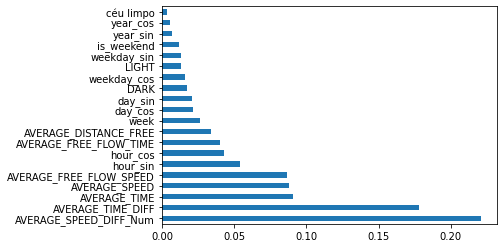

In [451]:
best_rf = best_clf_rf.best_estimator_.fit(X_res,y_res)

feat_importances = pd.Series(best_rf.steps[1][1].feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [452]:
'''param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85,1],
    'max_depth': [None,10,20,30,50,100,200,300],
    'reg_alpha': [0,1,2],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.2,0.3,0.5,0.6,0.7],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

new_params = {'xgb__' + key: param_grid[key] for key in param_grid}

xgb_pipe = Pipeline(steps=[("smote", smote), ("xgb", xgb)])

clf_xgb = RandomizedSearchCV(xgb_pipe, param_distributions = new_params, cv = cv_strat, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X,y)
clf_performance(best_clf_xgb,'XGB')'''


'param_grid = {\n    \'n_estimators\': [450,500,550],\n    \'colsample_bytree\': [0.75,0.8,0.85,1],\n    \'max_depth\': [None,10,20,30,50,100,200,300],\n    \'reg_alpha\': [0,1,2],\n    \'reg_lambda\': [2, 5, 10],\n    \'subsample\': [0.55, 0.6, .65],\n    \'learning_rate\':[0.2,0.3,0.5,0.6,0.7],\n    \'gamma\':[.5,1,2],\n    \'min_child_weight\':[0.01],\n    \'sampling_method\': [\'uniform\']\n}\n\nnew_params = {\'xgb__\' + key: param_grid[key] for key in param_grid}\n\nxgb_pipe = Pipeline(steps=[("smote", smote), ("xgb", xgb)])\n\nclf_xgb = RandomizedSearchCV(xgb_pipe, param_distributions = new_params, cv = cv_strat, verbose = True, n_jobs = -1)\nbest_clf_xgb = clf_xgb.fit(X,y)\nclf_performance(best_clf_xgb,\'XGB\')'

In [453]:

param_grid = {
    'n_estimators': [550],
    'colsample_bytree': [0.75],
    'max_depth': [50],
    'reg_alpha': [2],
    'reg_lambda': [5],
    'subsample': [0.55],
    'learning_rate':[0.3],
    'gamma':[.5],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

new_params = {'xgb__' + key: param_grid[key] for key in param_grid}

xgb_pipe = Pipeline(steps=[("smote", smote), ("xgb", xgb)])

clf_xgb = GridSearchCV(xgb_pipe, param_grid = new_params, cv = cv_strat, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_res,y_res)
clf_performance(best_clf_xgb,'XGB')


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.4min finished


[23:06:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB
Best Score: 0.7926224365893145
Test Score: 0.8048422597212033
Best Parameters: {'xgb__colsample_bytree': 0.75, 'xgb__gamma': 0.5, 'xgb__learning_rate': 0.3, 'xgb__max_depth': 50, 'xgb__min_child_weight': 0.01, 'xgb__n_estimators': 550, 'xgb__reg_alpha': 2, 'xgb__reg_lambda': 5, 'xgb__sampling_method': 'uniform', 'xgb__subsample': 0.55}


In [454]:
lr.fit(X_res,y_res)
dt.fit(X_res,y_res)
knn.fit(X_res,y_res)
rf.fit(X_res,y_res)
xgb.fit(X_res,y_res)

[23:06:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [455]:
all_models=[lr,dt,knn,rf,xgb,best_clf_knn,best_clf_rf,best_clf_xgb]

______________________________________________
LogisticRegression(random_state=2021, solver='liblinear')
..............................................


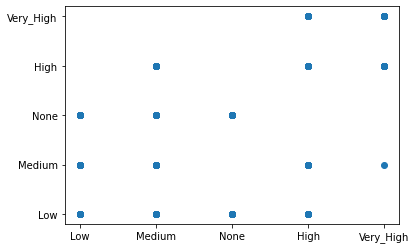

______________________________________________
DecisionTreeClassifier(random_state=2021)
..............................................


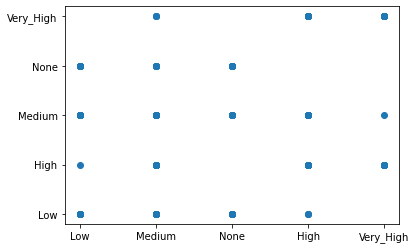

______________________________________________
KNeighborsClassifier()
..............................................


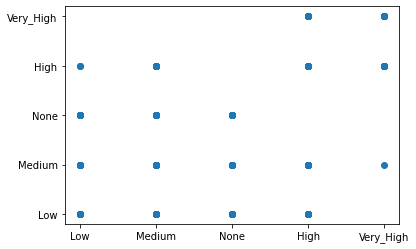

______________________________________________
RandomForestClassifier(random_state=2021)
..............................................


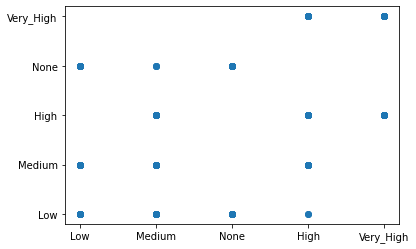

______________________________________________
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
..............................................


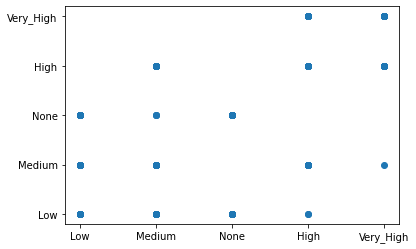

______________________________________________
GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=False),
             estimator=Pipeline(steps=[('smote', SMOTE(k_neighbors=3)),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__algorithm': ['auto'], 'knn__n_neighbors': [3],
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             verbose=True)
..............................................


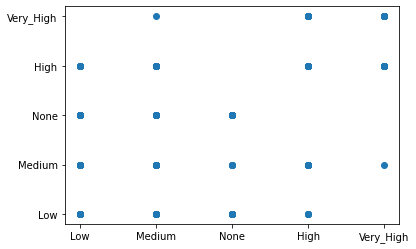

______________________________________________
GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=False),
             estimator=Pipeline(steps=[('smote', SMOTE(k_neighbors=3)),
                                       ('rf',
                                        RandomForestClassifier(random_state=2021))]),
             n_jobs=-1,
             param_grid={'rf__bootstrap': [True], 'rf__criterion': ['gini'],
                         'rf__max_depth': [25], 'rf__max_features': ['sqrt'],
                         'rf__min_samples_leaf': [1],
                         'rf__min_samples_split': [2],
                         'rf__n_estimators': [100]},
             verbose=True)
..............................................


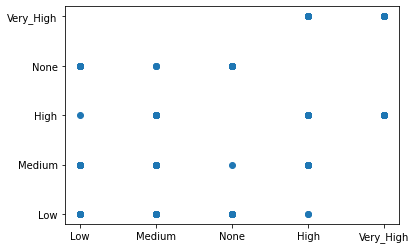

______________________________________________
GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=False),
             estimator=Pipeline(steps=[('smote', SMOTE(k_neighbors=3)),
                                       ('xgb',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      enable_categorical=False,
                                                      gamma=0, gpu_id=-1,
                                                      importance_type=None,
                                                      interaction_constraints='',
                                                      learning_rate=0.3...
     

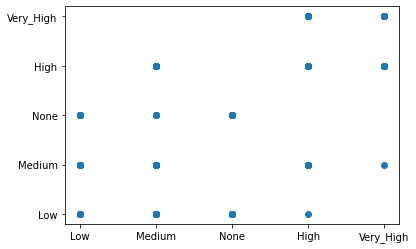

In [456]:
for i in all_models:
    print('______________________________________________')
    print(i)
    print('..............................................')
    prediction = i.predict(X_test)
    plt.scatter(y_test,prediction)
    plt.show()

In [457]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import make_classification

In [458]:
y.values

array(['Medium', 'High', 'High', ..., 'None', 'None', 'Medium'],
      dtype=object)

______________________________________________
LogisticRegression(random_state=2021, solver='liblinear')
..............................................


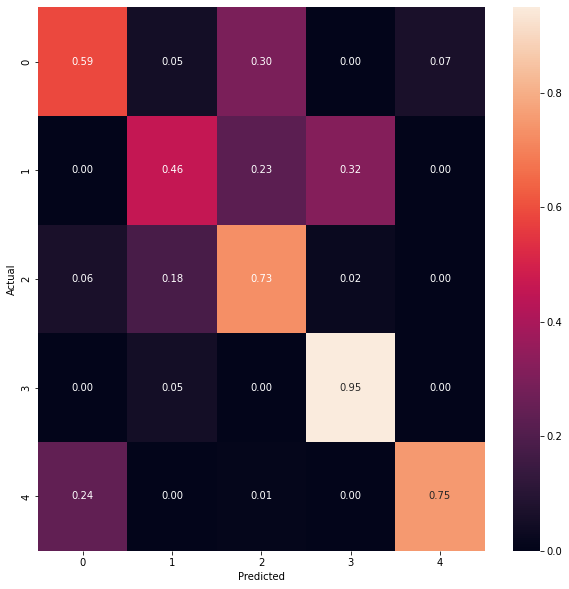

______________________________________________
DecisionTreeClassifier(random_state=2021)
..............................................


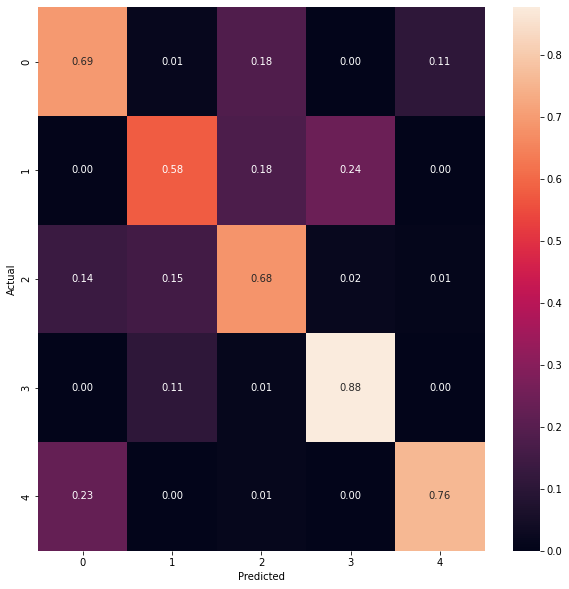

______________________________________________
KNeighborsClassifier()
..............................................


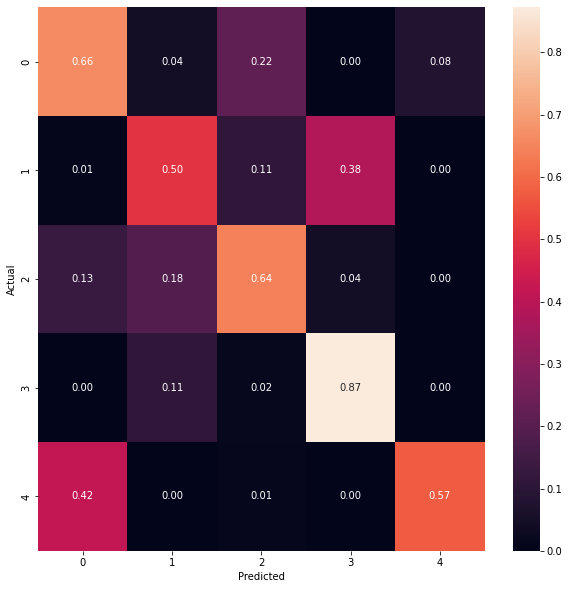

______________________________________________
RandomForestClassifier(random_state=2021)
..............................................


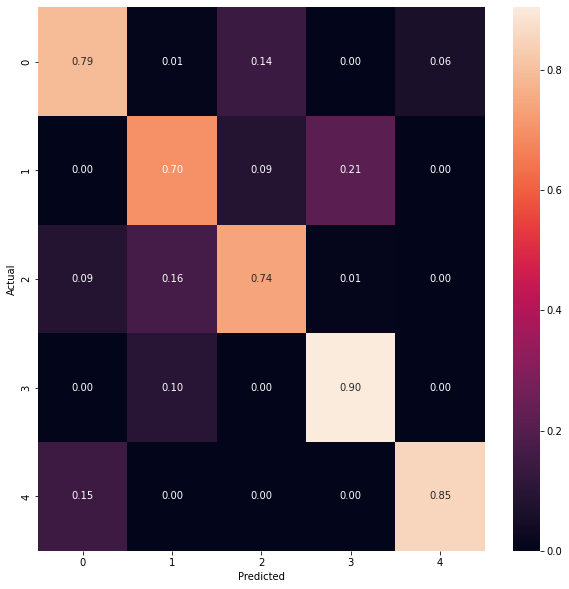

______________________________________________
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
..............................................


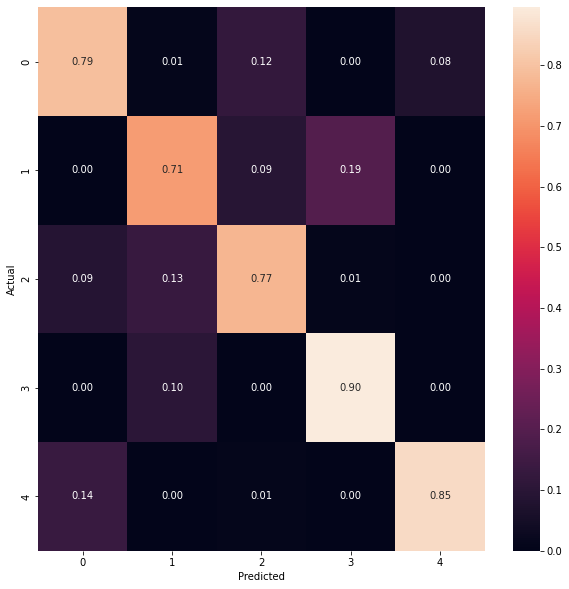

______________________________________________
GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=False),
             estimator=Pipeline(steps=[('smote', SMOTE(k_neighbors=3)),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__algorithm': ['auto'], 'knn__n_neighbors': [3],
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             verbose=True)
..............................................


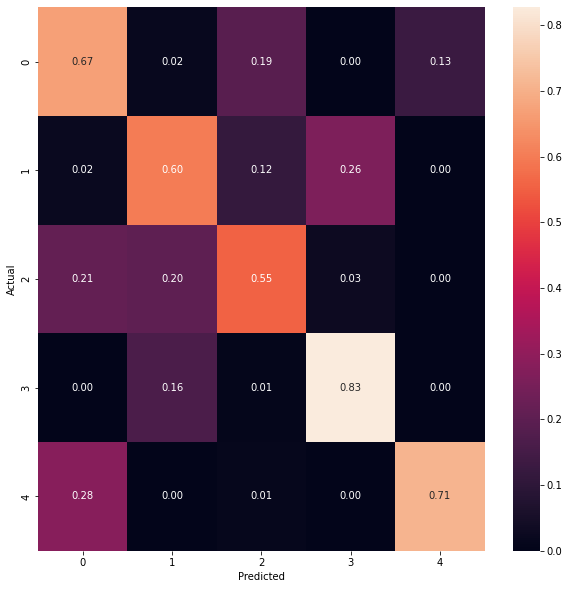

______________________________________________
GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=False),
             estimator=Pipeline(steps=[('smote', SMOTE(k_neighbors=3)),
                                       ('rf',
                                        RandomForestClassifier(random_state=2021))]),
             n_jobs=-1,
             param_grid={'rf__bootstrap': [True], 'rf__criterion': ['gini'],
                         'rf__max_depth': [25], 'rf__max_features': ['sqrt'],
                         'rf__min_samples_leaf': [1],
                         'rf__min_samples_split': [2],
                         'rf__n_estimators': [100]},
             verbose=True)
..............................................


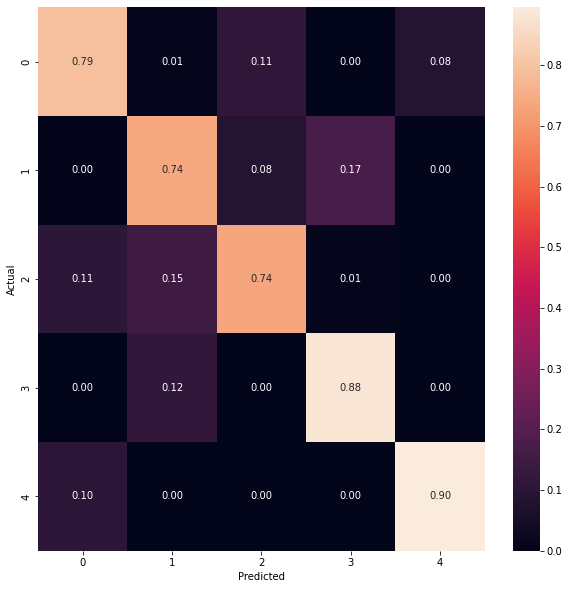

______________________________________________
GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=False),
             estimator=Pipeline(steps=[('smote', SMOTE(k_neighbors=3)),
                                       ('xgb',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      enable_categorical=False,
                                                      gamma=0, gpu_id=-1,
                                                      importance_type=None,
                                                      interaction_constraints='',
                                                      learning_rate=0.3...
     

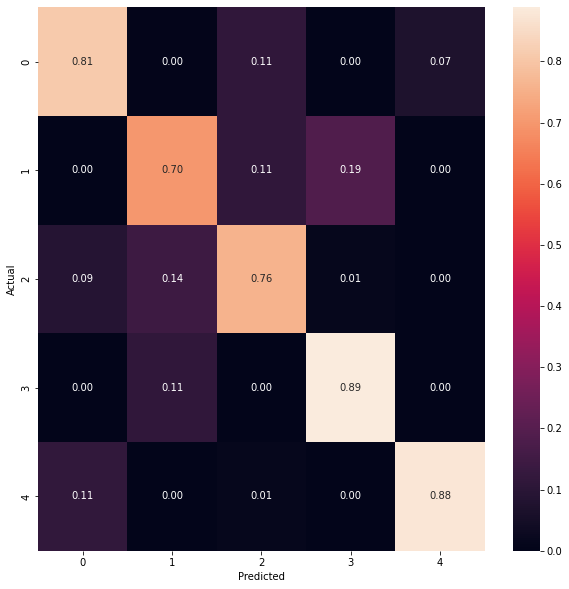

In [459]:
for i in all_models:
    print('______________________________________________')
    print(i)
    print('..............................................')
    y_pred = i.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    # Normalise
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cmn, annot=True, fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show(block=False)

In [460]:
import pickle

In [461]:
#filename = 'rf-grid-81-75-73-90-92.sav'
#pickle.dump(best_clf_rf, open(filename, 'wb'))

In [462]:
#loaded_model = pickle.load(open(filename, 'rb'))

In [463]:
testing = pd.read_csv('processedTest.csv')

In [464]:
#testing[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED','AVERAGE_TIME','AVERAGE_SPEED','AVERAGE_SPEED_DIFF_Num']] = scaler.transform(testing[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED','AVERAGE_TIME','AVERAGE_SPEED','AVERAGE_SPEED_DIFF_Num']])

In [465]:
#testing_scaled = scaler.transform(testing)

In [466]:
prediction = best_clf_rf.predict(testing)

In [467]:
prediction = pd.DataFrame({'AVERAGE_SPEED_DIFF': prediction})

In [468]:
#prediction.loc[prediction.AVERAGE_SPEED_DIFF == 0, 'AVERAGE_SPEED_DIFF'] = 'None'
#prediction.loc[prediction.AVERAGE_SPEED_DIFF == 1, 'AVERAGE_SPEED_DIFF'] = 'Low'
#prediction.loc[prediction.AVERAGE_SPEED_DIFF == 2, 'AVERAGE_SPEED_DIFF'] = 'Medium'
#prediction.loc[prediction.AVERAGE_SPEED_DIFF == 3, 'AVERAGE_SPEED_DIFF'] = 'High'
#prediction.loc[prediction.AVERAGE_SPEED_DIFF == 4, 'AVERAGE_SPEED_DIFF'] = 'Very_High'


In [469]:
sub_df = pd.read_csv('example_submission.csv')
final_data = {'RowId': sub_df.RowId, 'Speed_Diff': prediction.AVERAGE_SPEED_DIFF}
submission = pd.DataFrame(data=final_data)

In [470]:
compare = pd.read_csv('sample_submission.csv')

In [471]:
submission['Speed_Diff'].value_counts()

None         427
Low          356
Medium       327
High         273
Very_High    117
Name: Speed_Diff, dtype: int64

In [472]:
compare['Speed_Diff'].value_counts()

None         482
Medium       340
Low          313
High         268
Very_High     97
Name: Speed_Diff, dtype: int64

In [473]:
df1 = np.where(submission['Speed_Diff'] == compare['Speed_Diff'], 'True', 'False')
df1 = pd.DataFrame(df1)
df1.columns=['equals']
df1.value_counts()

equals
True      1244
False      256
dtype: int64

In [474]:
submission.to_csv('submission.csv',index=False)